In [32]:
#импортируем нужные нам библиотеки 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#импортируем  класс для выполнения линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#библиотека для облегчения изучения и использования библиотеки scikit-learn
import mglearn 

In [33]:
from sklearn.datasets import load_linnerud

In [34]:
# загружаем датасет load_linnerud в переменную linnerud_data
linnerud_data = load_linnerud()

In [5]:
# выводим список ключей
print(linnerud_data.keys())

dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [6]:
#выводим информацию о датасете
print(linnerud_data.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

|details-start|
**References**
|details-split|

* Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
  Editions Technic.

|details-end|


In [11]:
#Имена признаков:
#Кол-во подтягиваний 
#Кол-во подъемов туловища
#Кол-во прыжков
print(linnerud_data['feature_names'])

['Chins', 'Situps', 'Jumps']


In [12]:
#Имена целевых переменных:
#Вес
#Обхват талии
#Пульс
print(linnerud_data['target_names'])

['Weight', 'Waist', 'Pulse']


In [13]:
# 20 - количество пациентов в наборе данных.
# 3 -  количество признаков.
X, y = linnerud_data.data, linnerud_data.target
print ("форма массива X: {}" .format (X. shape))

форма массива X: (20, 3)


In [16]:
#создали объект DataFrame из данных датасета 
#используя команду head() выводим первые нескольких, чтобы увидеть, как данные выглядят.
# Добавляем по одной целевые переменные 
linnerud_df = pd.DataFrame(data=linnerud_data.data, columns=linnerud_data.feature_names)
linnerud_df['target_weight'] = linnerud_data.target[:, 0] 
linnerud_df['target_waist'] = linnerud_data.target[:, 1]  
linnerud_df['target_pulse'] = linnerud_data.target[:, 2]  

linnerud_df.head()

,Chins,Situps,Jumps,target_weight,target_waist,target_pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


In [17]:
#так же можно вывести данные в таком виде
print(linnerud_df.iloc[0])

Chins              5.0
Situps           162.0
Jumps             60.0
target_weight    191.0
target_waist      36.0
target_pulse      50.0
Name: 0, dtype: float64


In [18]:
#провреяем количесво пропущенных значений, чтобы позже мы могли работать с данными
#результат равен нулю для всех столбцов, это означает, что в данных нет пропущенных значений, и данные полные
linnerud_df.isnull().sum()

Chins            0
Situps           0
Jumps            0
target_weight    0
target_waist     0
target_pulse     0
dtype: int64

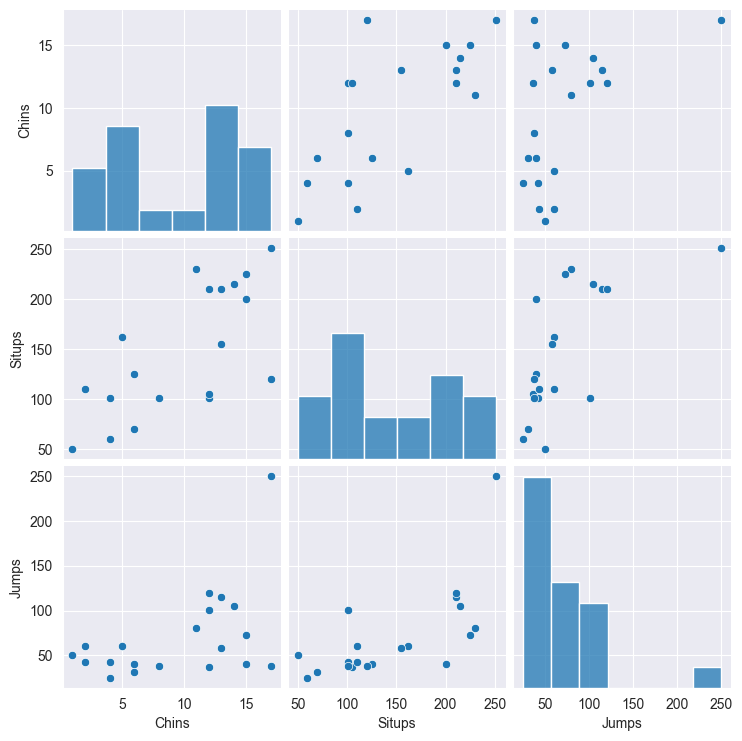

In [25]:
#так как данный датасет имеет многомерные целевые переменные,визуализация матрицы рассеяния была задачей сложной.
#по этой причине мы создали альтернативную диагрумму,где можно можно посмотреть график с парами переменных и увидеть их взаимосвязь

sns.pairplot(linnerud_df)
plt.show()


Для нашего датасета Linnerrud, представляющий собой многомерную регрессию, метод KNeighborsRegressor не подходит. По это причине мы переходим к регрессии

In [28]:
#Множественная линейная регрессия:
# Выберем признаки (exercise) и целевые переменные (physiological)
# Разбиваем данные на обучающий и тестовый наборы
# Создаем и обучаем модель множественной линейной регрессии
# Выводим коэффициенты модели и оценки

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = linnerud_data.data
y = linnerud_data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

print("Коэффициенты модели: {}".format(model.coef_))
print("Оценка на обучающем наборе: {:.2f}".format(model.score(X_train, y_train)))
print("Оценка на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))



Коэффициенты модели: [[-2.20870477 -0.19794006  0.14152393]
 [-0.28363824 -0.03849608  0.03054474]
 [ 0.07445964  0.00820161  0.01367533]]
Оценка на обучающем наборе: 0.37
Оценка на тестовом наборе: -1.21


In [31]:
#Линейные модели регрессии для  датасет Linnerrud
# Загружаем данные
# Разбиваем данные на обучающий и тестовый наборы
# Создаем и обучаем модель линейной регрессии
# Выводим результата
X = linnerud_data.data
y = linnerud_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

print("Коэффициенты модели: {}".format(model.coef_))
print("Оценка на обучающем наборе: {:.2f}".format(model.score(X_train, y_train)))
print("Оценка на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))


Коэффициенты модели: [[-2.20870477 -0.19794006  0.14152393]
 [-0.28363824 -0.03849608  0.03054474]
 [ 0.07445964  0.00820161  0.01367533]]
Оценка на обучающем наборе: 0.37
Оценка на тестовом наборе: -1.21


In [38]:
#гребневая регрессия
#делим данные на обучающий и тестовый наборы
# создали объект модели Ridge
# Обучили
# Вывели результат

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X, y = linnerud_data.data, linnerud_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train)
print("Коэффициенты Ridge: {}".format(ridge.coef_))
print("Оценка на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("Оценка на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))


Коэффициенты Ridge: [[-2.19750655 -0.19836128  0.14131926]
 [-0.28220168 -0.03854924  0.03051747]
 [ 0.07408403  0.00821626  0.01368135]]
Оценка на обучающем наборе: 0.37
Оценка на тестовом наборе: -1.20


In [40]:
#Lasso регрессии
#делим данные на обучающий и тестовый наборы
# создали объект модели Lasso
# Обучили
# Вывели результат

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X, y = linnerud_data.data, linnerud_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lasso = Lasso(alpha=1.0)  
lasso.fit(X_train, y_train)

print("Коэффициенты Lasso: {}".format(lasso.coef_))
print("Оценка на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Оценка на тестовом наборе: {:.2f}".format(lasso.score(X_test, y_test)))


Коэффициенты Lasso: [[-2.12867343 -0.19994931  0.13888867]
 [-0.20365804 -0.04049051  0.02789933]
 [ 0.          0.01099885  0.01468573]]
Оценка на обучающем наборе: 0.37
Оценка на тестовом наборе: -1.06


Работа с датасетом Linnerrud представляет собой задачу мульти-регрессии, где требуется предсказать три физиологических параметра (вес, объем талии и пульс) на основе трех упражнений (подтягивания, скручивания и прыжков). В данном контексте были проведены следующие шаги:

1. Загрузка данных: Датасет Linnerrud содержит информацию о 20 мужчинах в фитнес-клубе. Для анализа используется шесть переменных - три физиологических и три переменных, связанных с упражнениями.

2. Предобработка данных: Данные в датасете были загружены и преобразованы в формат удобный для анализа с использованием библиотек pandas и numpy.

3. Визуализация данных: Исследование данных началось с визуализации, чтобы понять связи между переменными. Визуализации включали в себя создание диаграмм рассеяния и графиков корреляции.

4. Линейные модели регрессии: Были построены линейные модели регрессии (линейная регрессия, гребневая регрессия, лассо регрессия) для предсказания физиологических параметров на основе данных об упражнениях. Модели позволяют предсказать значения целевых переменных на основе данных об упражнениях.

5. Выводы: В ходе анализа данных Linnerrud были построены и оценены линейные модели регрессии, которые могут быть использованы для предсказания физиологических параметров на основе данных об упражнениях. Какие-то модели могут оказаться более подходящими, в зависимости от конкретной задачи и критериев оценки.

Эта работа может помочь лучше понять взаимосвязь между физиологическими параметрами и упражнениями, а также предсказать значения физиологических параметров на основе упражнений, что может быть полезно в области физиотерапии, спортивной медицины и тренировок.